kappa:  0.1
[7.952824348728697, 9.17981239977917, 6.179553161659101, 3.851076138748387, 2.7096614445512706, 1.9696634779640496, 1.4995520175723898, 1.1751566102999411, 0.9355584449014, 0.7468300656017152, 0.6148052221838902, 0.5035215451532107, 0.4094511745769347, 0.3383002330286184, 0.27780199323981236, 0.2270816087477474, 0.18567076216600484, 0.15058842403999778, 0.11774798632004016, 0.09101319920981073]


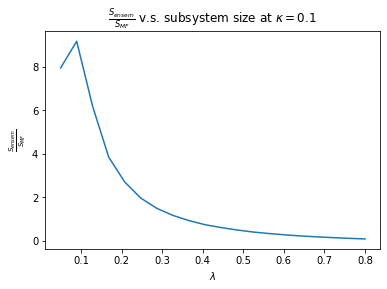

kappa:  0.2
[3.4666285444380693, 3.6813344207559897, 3.9265868244937203, 4.348420097609452, 4.532337676640544, 3.0869417867882554, 2.2680900257066234, 1.7346751563333878, 1.361967468653601, 1.0827968775446948, 0.8785591751826684, 0.710936652120219, 0.5838134377173906, 0.4779484051800017, 0.38987336207557854, 0.3167987518874216, 0.2582589152398528, 0.20702840821722812, 0.1640664179026597, 0.1269929662569506]


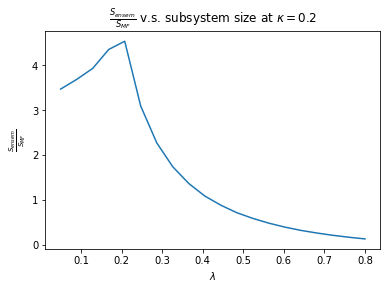

kappa:  0.30000000000000004
[2.081239485832434, 2.16297595733449, 2.274281241316351, 2.406018233882355, 2.557583317166533, 2.7759472231804514, 3.095829237137389, 2.6237323932982783, 1.9754337646770088, 1.5397817261988986, 1.2208999109222325, 0.9757273205439543, 0.7942062588156756, 0.6408204826062717, 0.528950742226123, 0.426784644694646, 0.34522164362115154, 0.2748220516891324, 0.21787866412186585, 0.16790199243798512]


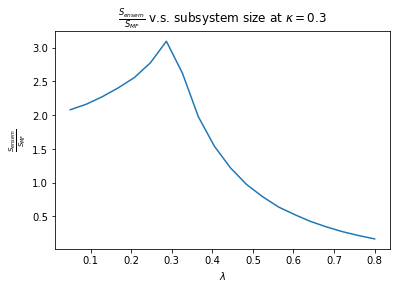

kappa:  0.4
[1.4096814655487269, 1.482186905226524, 1.5332814797915832, 1.591472483959481, 1.6665782004810623, 1.7494807600790614, 1.8655125028393784, 1.994339217118232, 2.198863920930817, 2.3657568920157273, 1.7723700290226774, 1.381510145977503, 1.106714686957288, 0.8829919186838422, 0.7171119253846404, 0.5745576146842369, 0.4629297265824465, 0.3662159075381068, 0.28784679382417616, 0.219834504620479]


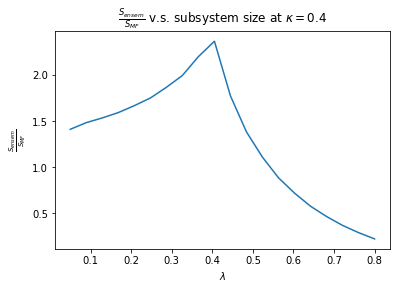

kappa:  0.5
[1.0368478539314505, 1.0645555023177513, 1.1053331726279647, 1.1480972347497167, 1.1924989019837466, 1.2394152309970365, 1.2946435579317868, 1.3617847198763915, 1.4420617065912291, 1.5338500814585916, 1.6520619018261025, 1.862106420952183, 1.655906427312398, 1.27054058356074, 1.00378190956023, 0.7993115071410415, 0.6314266249909417, 0.4979024937301275, 0.3892412853028014, 0.29822968172612235]


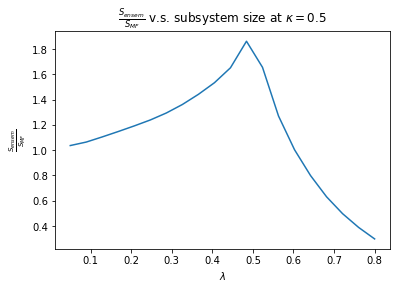

KeyboardInterrupt: 

In [7]:
#Test the small-lambda limit of the entropy of the Jacobi ensemble.
#At small lambda, S from Jacobi ensemble should agree with the mean field entropy.
#HOWEVER, this does not seem to be true in general.

import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
from scipy.linalg import fractional_matrix_power as fracpower
from numpy import linalg as LA
from numpy.linalg import inv 
from scipy.stats import unitary_group
from random import shuffle



def generateC(m1,m2,m):
    A = np.array((np.random.normal(0, 1, m1*m)+1j*np.random.normal(0, 1, m1*m))).reshape((m1,m))/2**0.5
    B = np.array((np.random.normal(0, 1, m2*m)+1j*np.random.normal(0, 1, m2*m))).reshape((m2,m))/2**0.5
    sqrtAB = fracpower(inv(A.conj().T.dot(A)+B.conj().T.dot(B)),0.5)
    C = sqrtAB.dot(A.conj().T).dot(A).dot(sqrtAB)
    w,v = LA.eig(C)
    for i in range(len(w)):
        if abs(w[i]<0.00001):
            w[i]=0
    w = np.real(w)
    return (C,w)
for k in range(1,8):
    ratio = []
    for lamb in np.linspace(0.05,0.8,20):
        N= 1000
        kappa = 0.1*k
        m=int(lamb*N)
        m1=int(kappa*N)
        m2=int((1-kappa)*N)
        C,w = generateC(m1,m2,m)
        temp = []
        for i in w:
            if i!=0 and abs(1-i)>0.000001:
                temp.append(i)
        w=np.array(temp)
        #print('w: ',w)
        S=sum(-w*np.log(w)-(1-w)*np.log(w))
        #print('S:',S)
        Smf = m*(-kappa*math.log(kappa)-(1-kappa)*math.log(1-kappa))
        ratio.append(S/Smf)
    plt.title(r'$\frac{S_{ensem}}{S_{MF}}$ v.s. subsystem size at $\kappa=$%.1f'%kappa)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$\frac{S_{ensem}}{S_{MF}}$')
    plt.plot(np.linspace(0.05,0.8,20), ratio)
    print('kappa: ',kappa)
    print(ratio)
    #plt.savefig('MF_limit_%d.png'%k,dpi=800)
    plt.show()

renyi_rel_S:  [188.22672939652722, 184.7503598881376, 181.00570689494077, 176.96615198771957, 172.60265918384806, 167.88385518657896, 162.7762892118086, 157.24495780807285, 151.25420627279323, 144.76914560571163, 137.75774686149998, 130.19378378214378, 122.06077622687098, 113.35702525889974, 104.10170919255916, 94.34180498811702, 84.15924973093365, 73.67710599729685, 63.06231677958317, 52.5210702915997, 42.28233592256379, 32.56868020050723, 23.561678466480657, 15.375994790667391, -2.2317274004267915]
Relative entropy at alpha=1:  114.42967735523402


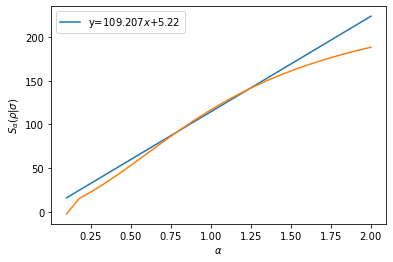

In [87]:
# Renyi relative entropy from correlation functions.
# S_alpha v.s. alpha
#In this cell, I picked a specific lambda= .3 and kappa= .5 
# It turned out that the relation is almost linear, which makes the extrapolation easy.

import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
from numpy.linalg import inv 
from scipy.stats import unitary_group
from numpy import linalg as LA
from scipy.linalg import fractional_matrix_power as fracpower


def generateC(m1,m2,m):
    A = np.array((np.random.normal(0, 1, m1*m)+1j*np.random.normal(0, 1, m1*m))).reshape((m1,m))/2**0.5
    B = np.array((np.random.normal(0, 1, m2*m)+1j*np.random.normal(0, 1, m2*m))).reshape((m2,m))/2**0.5
    sqrtAB = fracpower(inv(A.conj().T.dot(A)+B.conj().T.dot(B)),0.5)
    C = sqrtAB.dot(A.conj().T).dot(A).dot(sqrtAB)
    w,v = LA.eig(C)
    for i in range(len(w)):
        if abs(w[i]<0.00001):
            w[i]=0
    w = np.real(w)
    return (C,w)

N= 1000
kappa = .5
lamb = 0.3
m=int(lamb*N)
m1=int(kappa*N)
m2=int((1-kappa)*N)
renyi_rel_S = []
identity = np.diag([1 for i in range(m)])

#generate two random correlation matrices
C1, ev1 = generateC(m1,m2,m)
C2, ev2 = generateC(m1,m2,m)

#The eigenvalues of I-C and I-C' .
ev_1_minus_C1 = 1-ev1
ev_1_minus_C2 = 1-ev2


for alpha in np.linspace(2,0.1,25):
    
    # Calculate the term 1+(( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
    long_term = identity+fracpower(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha)).dot(C2.dot(inv(identity-C2))).dot(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha))),alpha)
    ev_last, _ = LA.eig(long_term)
    ev_last = np.real(ev_last)
    S_last_term = sum(np.log(ev_last))
    S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*S_last_term
    renyi_rel_S.append(S_alpha)
    
#linear fit seems to be sufficient
#i print out both the original curve and the linear fit for comparison.
s1, s0 = np.polyfit(np.linspace(2,0.1,25)[9:16], renyi_rel_S[9:16],1)
plt.plot(np.linspace(2,0.1,25), [s1*i+s0 for i in np.linspace(2,0.1,25)],label=r'y=%.3f$x$+%.2f'%(s1,s0))

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$S_\alpha (\rho\|\sigma)$')
plt.legend()
plt.plot(np.linspace(2,0.1,25), renyi_rel_S)
#plt.savefig('relative_renyi_S_vs_alpha.png',dpi=800)

print("renyi_rel_S: ",renyi_rel_S)
print('Relative entropy at alpha=1: ',sum((s1,s0)))

kappa: 0.1
lamb: 0.05


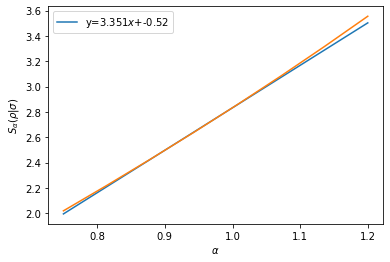

kappa: 0.1
lamb: 0.058333333333333334


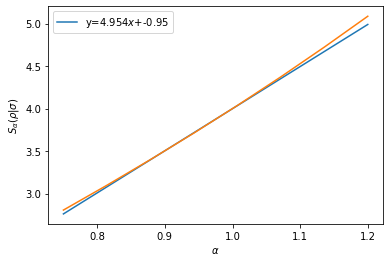

kappa: 0.1
lamb: 0.06666666666666667


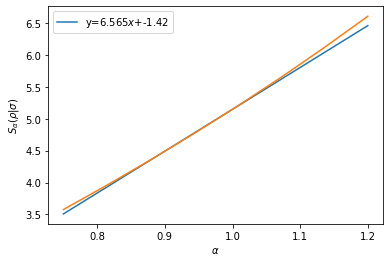

kappa: 0.1
lamb: 0.07500000000000001


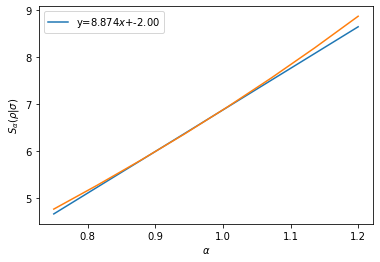

kappa: 0.1
lamb: 0.08333333333333334


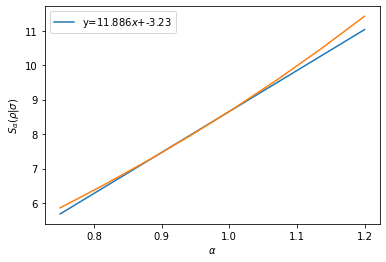

kappa: 0.1
lamb: 0.09166666666666667


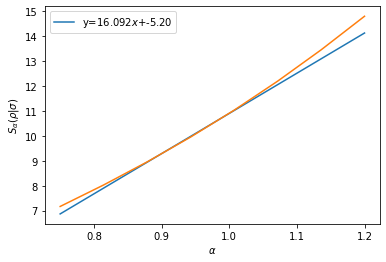

kappa: 0.1
lamb: 0.1


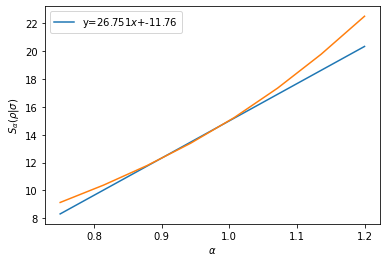

list_S_1: [2.8322448774187374, 3.9996704906419183, 5.14844769386531, 6.874968441941851, 8.65406440856544, 10.892309175232006, 14.996183670640708]
list_S_1_avg: [0.05664489754837475, 0.06895983604555031, 0.07800678324038349, 0.09166624589255802, 0.10426583624777637, 0.11969570522232974, 0.1499618367064071]


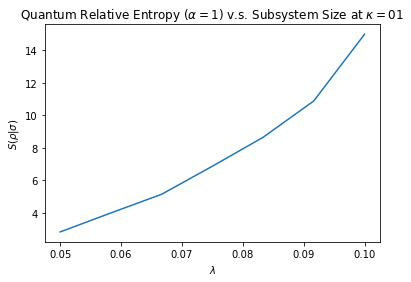

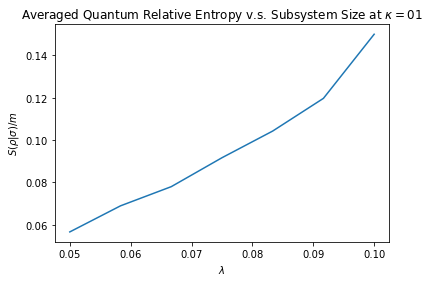

kappa: 0.30000000000000004
lamb: 0.05


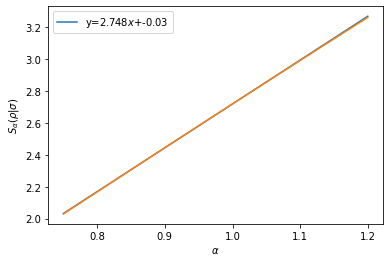

kappa: 0.30000000000000004
lamb: 0.09166666666666667


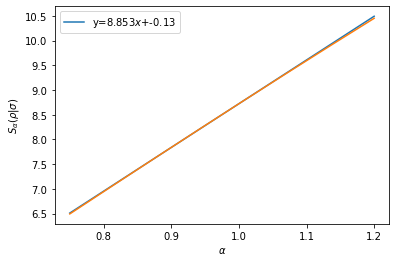

kappa: 0.30000000000000004
lamb: 0.13333333333333336


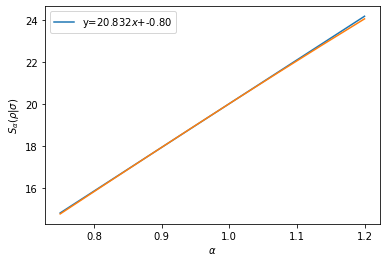

kappa: 0.30000000000000004
lamb: 0.17500000000000004


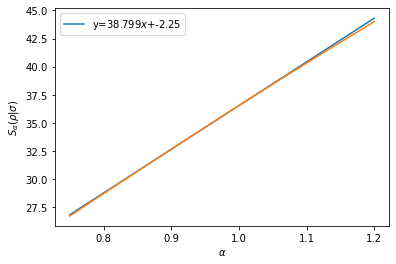

kappa: 0.30000000000000004
lamb: 0.21666666666666673


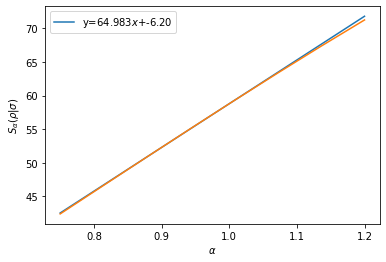

kappa: 0.30000000000000004
lamb: 0.2583333333333334


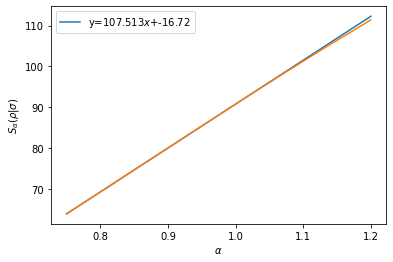

kappa: 0.30000000000000004
lamb: 0.30000000000000004


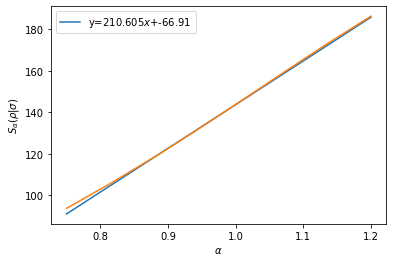

list_S_1: [2.7191677444245577, 8.723406657927574, 20.02990347341244, 36.547627456605184, 58.78419874275029, 90.78874177188905, 143.6949685604926]
list_S_1_avg: [0.05438335488849115, 0.09586161162557774, 0.15060077799558225, 0.20884358546631535, 0.27214906825347357, 0.35189434795305835, 0.4789832285349754]


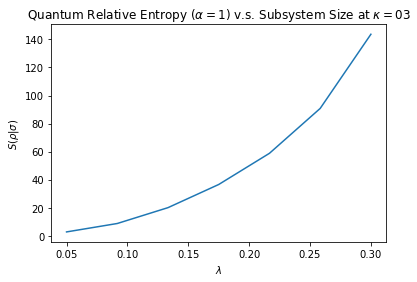

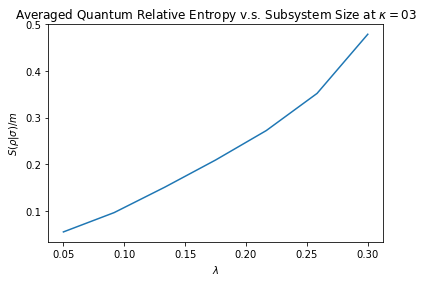

kappa: 0.5
lamb: 0.05


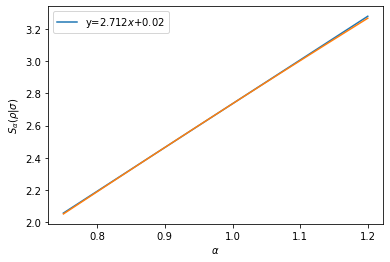

kappa: 0.5
lamb: 0.125


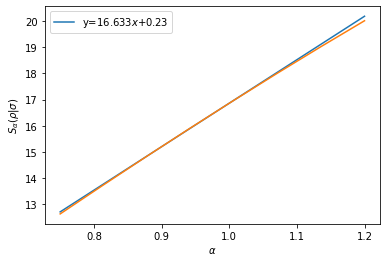

kappa: 0.5
lamb: 0.2


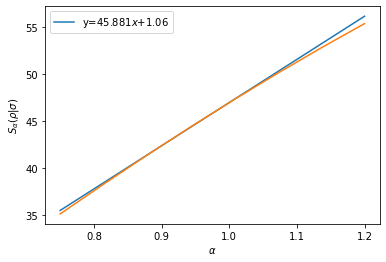

kappa: 0.5
lamb: 0.27499999999999997


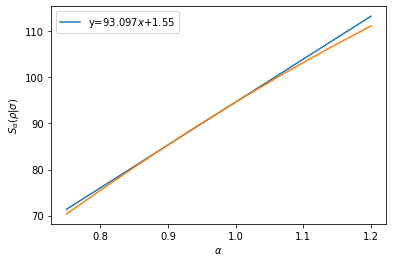

kappa: 0.5
lamb: 0.35


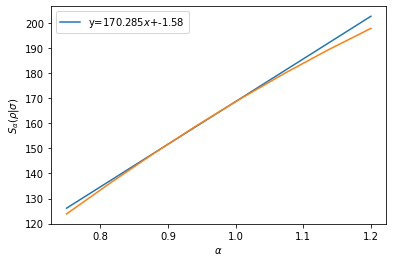

kappa: 0.5
lamb: 0.425


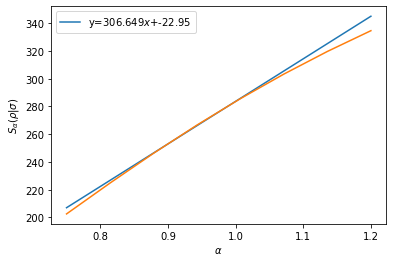

kappa: 0.5
lamb: 0.5


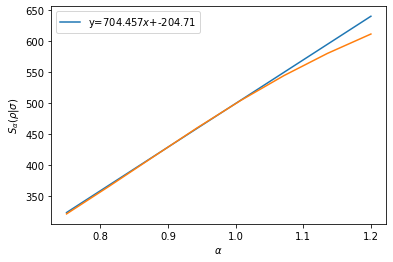

list_S_1: [2.7351516013728268, 16.85959144948212, 46.94392913237948, 94.64700522892777, 168.7090305329951, 283.69857715077194, 499.74929163973115]
list_S_1_avg: [0.054703032027456536, 0.13487673159585697, 0.2347196456618974, 0.34542702638294803, 0.4820258015228431, 0.6675260638841692, 0.9994985832794623]


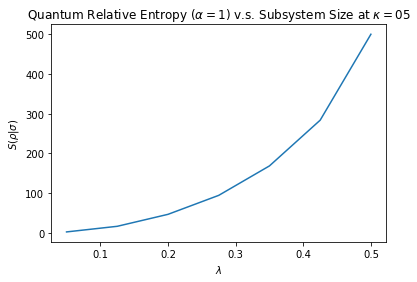

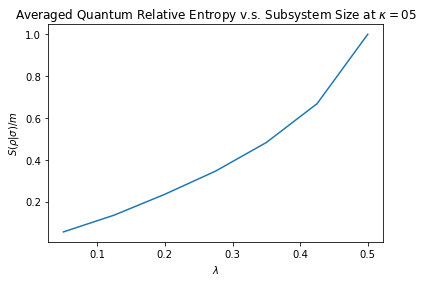

kappa: 0.7000000000000001
lamb: 0.05


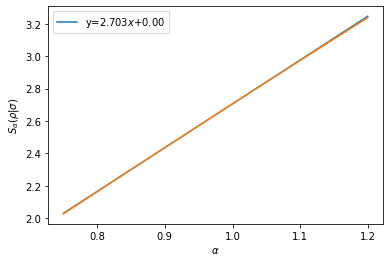

kappa: 0.7000000000000001
lamb: 0.15833333333333333


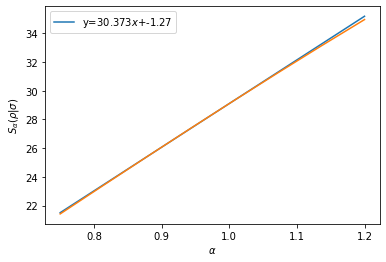

kappa: 0.7000000000000001
lamb: 0.26666666666666666


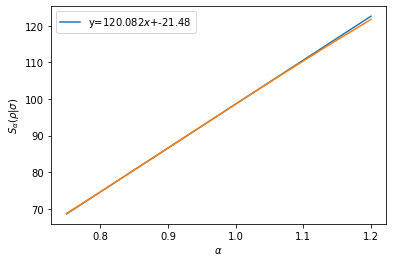

/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in log
/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in log


kappa: 0.7000000000000001
lamb: 0.375


LinAlgError: SVD did not converge in Linear Least Squares

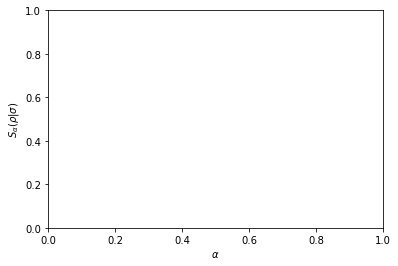

In [136]:
#Quantum relative entropy v.s. the subsystem size.
#This is done with fixed kappa=0.1, 0.3, 0.5, 0.7, 0.9 
#S_alpha=1 v.s. lambda
#It seems that S blows up when lambda is larger than lambda.
#It also seems that the entropy blows up when lambda+kappa>1.

N= 1000
for k in range(1,10,2):
    kappa = k*0.1
    list_S_1=[]
    list_S_1_avg=[]
    list_lambda=[]
    for lamb in np.linspace(0.05,kappa,7):
        m=int(lamb*N)
        m1=int(kappa*N)
        m2=int((1-kappa)*N)
        identity = np.diag([1 for i in range(m)])
        list_lambda.append(lamb)
        renyi_rel_S = []

        C1, ev1 = generateC(m1,m2,m)
        C2, ev2 = generateC(m1,m2,m)

        #The eigenvalues of I-C and I-C' .
        ev_1_minus_C1 = 1-ev1
        ev_1_minus_C2 = 1-ev2


        for alpha in np.linspace(1.2,0.75,8):

            # Calculate the term 1+(( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
            long_term = identity+fracpower(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha)).dot(C2.dot(inv(identity-C2))).dot(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha))),alpha)
            ev_last, _ = LA.eig(long_term)
            ev_last = np.real(ev_last)
            S_last_term = sum(np.log(ev_last))
            S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*S_last_term
            renyi_rel_S.append(S_alpha)
        print('kappa:',kappa)
        print('lamb:',lamb)
        plt.xlabel(r'$\alpha$')
        plt.ylabel(r'$S_\alpha (\rho\|\sigma)$')
        s1, s0 = np.polyfit(np.linspace(1.2,0.75,8)[3:6], renyi_rel_S[3:6],1)
        plt.plot(np.linspace(1.2,0.75,8), [s1*i+s0 for i in np.linspace(1.2,0.75,8)],label=r'y=%.3f$x$+%.2f'%(s1,s0))
        plt.plot(np.linspace(1.2,0.75,8), renyi_rel_S)
        plt.legend()
        plt.show()
        list_S_1.append(s1+s0)
        list_S_1_avg.append((s1+s0)/m)
    print('list_S_1:',list_S_1)
    print('list_S_1_avg:',list_S_1_avg)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$S(\rho\|\sigma)$')
    plt.title(r'Quantum Relative Entropy ($\alpha=1$) v.s. Subsystem Size at $\kappa=0.$%d'%k)
    plt.plot(list_lambda, list_S_1)
    #plt.savefig('S_1_vs_lambda_k%d.png'%k,dpi=800)
    plt.show()
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$S(\rho\|\sigma)/m$')
    plt.title(r'Averaged Quantum Relative Entropy v.s. Subsystem Size at $\kappa=0.$%d'%k)
    plt.plot(list_lambda, list_S_1_avg)
    #plt.savefig('S_1_vs_lambda_avg_k%d.png'%k,dpi=800)
    plt.show()

kappa: 0.1
lamb: 0.05


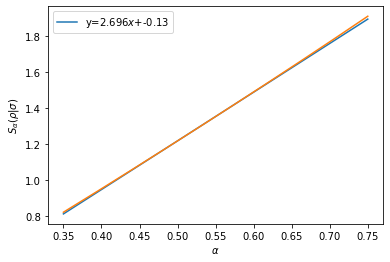

kappa: 0.1
lamb: 0.125


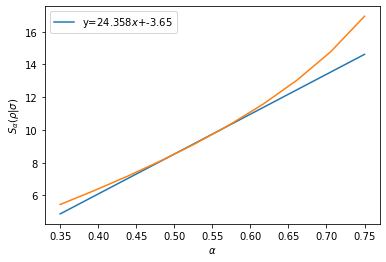

kappa: 0.1
lamb: 0.2


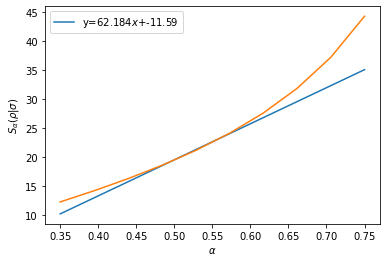

kappa: 0.1
lamb: 0.27499999999999997


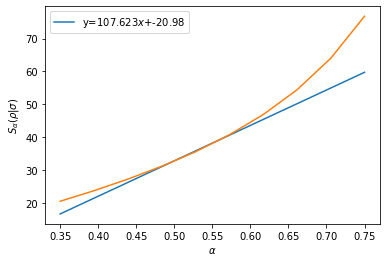

kappa: 0.1
lamb: 0.35


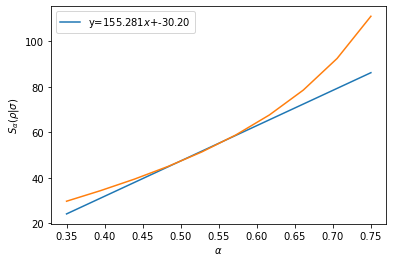

kappa: 0.1
lamb: 0.425


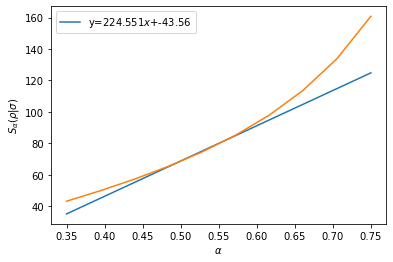

kappa: 0.1
lamb: 0.5


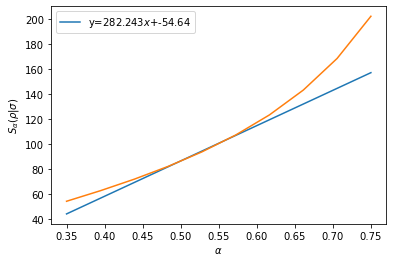

list_log_F: [1.2183523598426917, 8.526657257204793, 19.50525546340493, 32.82759184310845, 47.441948480089906, 68.71175176007466, 86.4848198939931]
list_log_F_avg:  [0.024367047196853835, 0.06821325805763834, 0.09752627731702464, 0.1198087293544104, 0.1355484242288283, 0.1616747100237051, 0.1729696397879862]


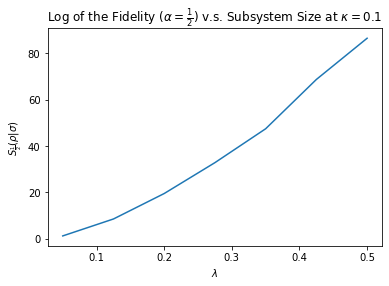

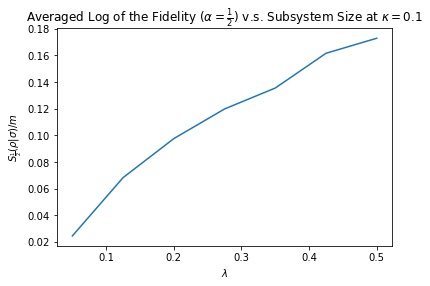

kappa: 0.30000000000000004
lamb: 0.05


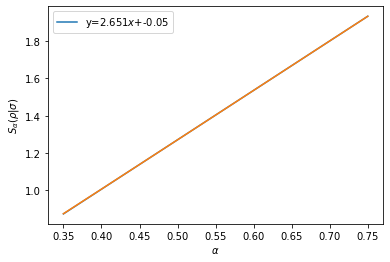

kappa: 0.30000000000000004
lamb: 0.125


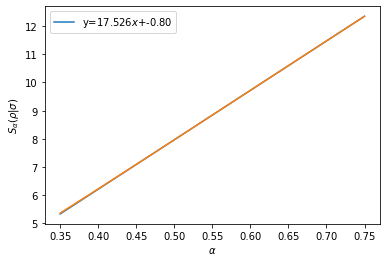

kappa: 0.30000000000000004
lamb: 0.2


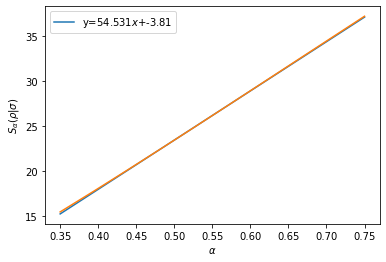

kappa: 0.30000000000000004
lamb: 0.27499999999999997


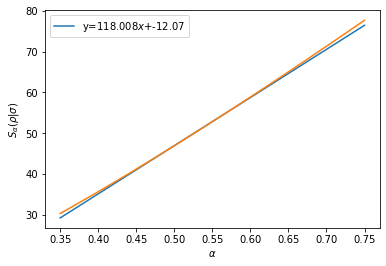

kappa: 0.30000000000000004
lamb: 0.35


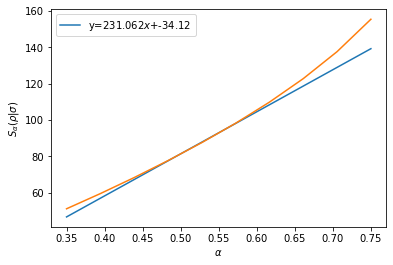

kappa: 0.30000000000000004
lamb: 0.425


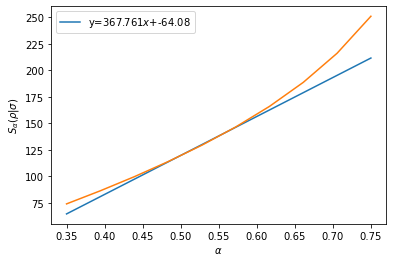

kappa: 0.30000000000000004
lamb: 0.5


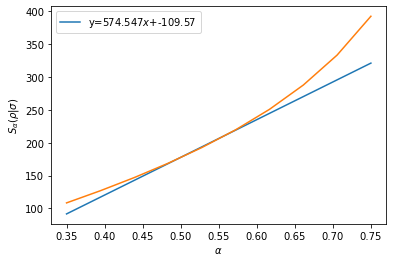

list_log_F: [1.2710070174131953, 7.968061108785828, 23.459580361213998, 46.936948455529674, 81.4117832532913, 119.80510528183443, 177.70416395937278]
list_log_F_avg:  [0.025420140348263908, 0.06374448887028662, 0.11729790180606998, 0.17130273158952436, 0.23260509500940374, 0.2818943653690222, 0.35540832791874555]


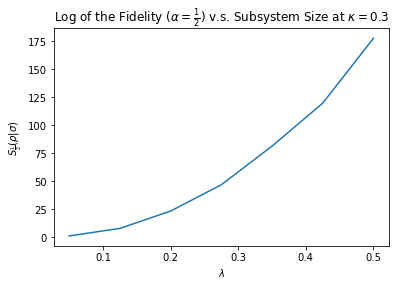

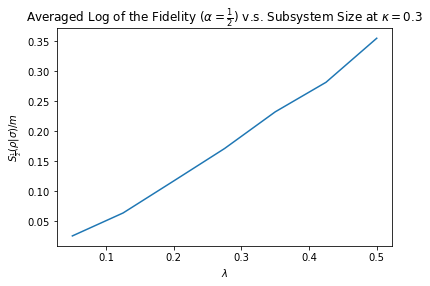

kappa: 0.5
lamb: 0.05


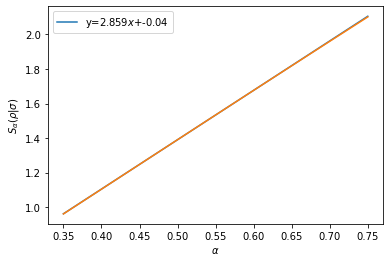

kappa: 0.5
lamb: 0.125


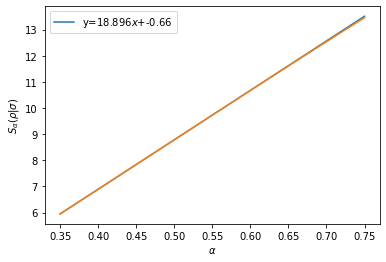

kappa: 0.5
lamb: 0.2


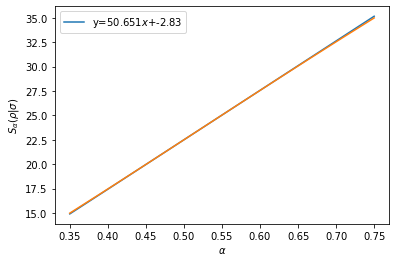

kappa: 0.5
lamb: 0.27499999999999997


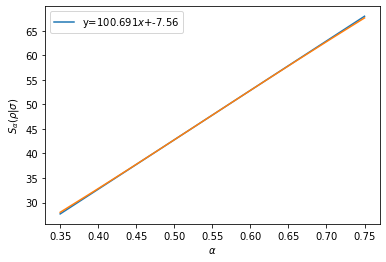

kappa: 0.5
lamb: 0.35


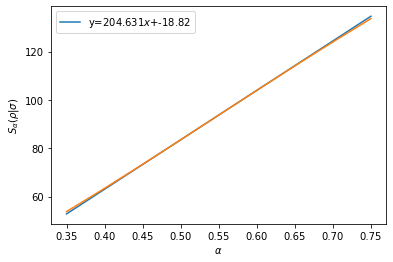

kappa: 0.5
lamb: 0.425


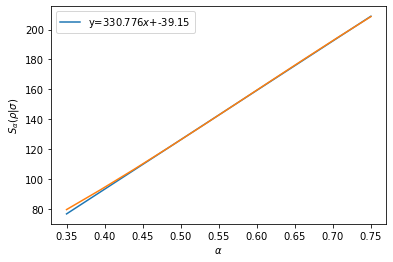

kappa: 0.5
lamb: 0.5


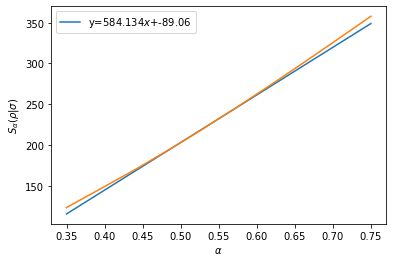

list_log_F: [1.390422550852351, 8.785448415567938, 22.49641603887749, 42.78278986345144, 83.49606207738522, 126.23649890416783, 203.0041759424249]
list_log_F_avg:  [0.027808451017047018, 0.0702835873245435, 0.11248208019438746, 0.15614156884471328, 0.23856017736395776, 0.2970270562451008, 0.4060083518848498]


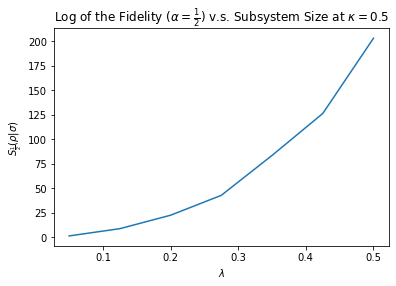

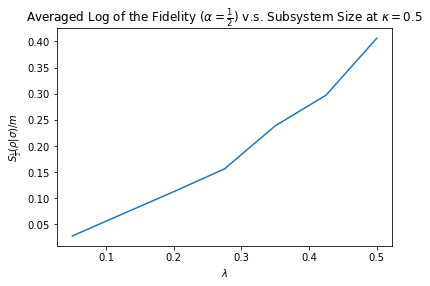

kappa: 0.7000000000000001
lamb: 0.05


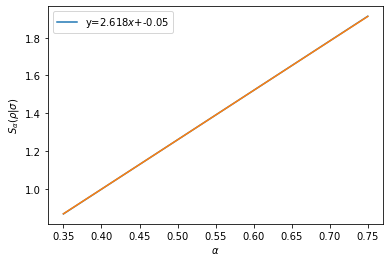

kappa: 0.7000000000000001
lamb: 0.125


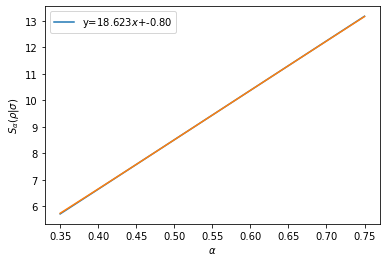

kappa: 0.7000000000000001
lamb: 0.2


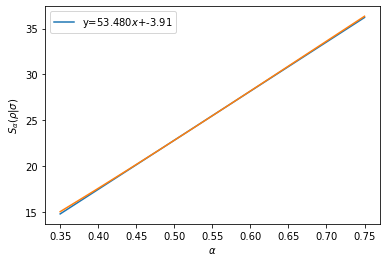

kappa: 0.7000000000000001
lamb: 0.27499999999999997


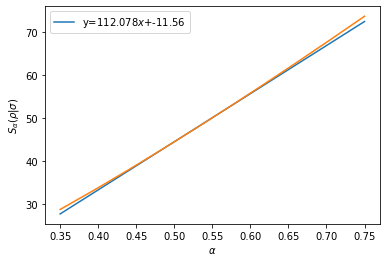

/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log
/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in log


kappa: 0.7000000000000001
lamb: 0.35


LinAlgError: SVD did not converge in Linear Least Squares

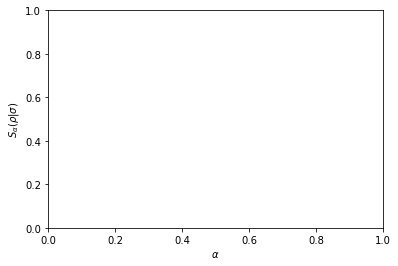

In [43]:
#log of fidelity v.s. the subsystem size. 
#S_alpha=1/2 v.s. lambda
#I verified that the curve is very linear when 0<alpha<1, so we can handle it similarly.
#It seems that S_1/2 blows up when lambda+kappa>1 as well.

N= 1000
for k in range(1,10,2):
    kappa = 0.1*k
    list_log_F=[]
    list_log_F_avg=[]
    list_lambda=[]
    for lamb in np.linspace(0.05,0.5,7):
        m=int(lamb*N)
        m1=int(kappa*N)
        m2=int((1-kappa)*N)
        identity = np.diag([1 for i in range(m)])
        list_lambda.append(lamb)
        renyi_rel_S = []

        U = unitary_group.rvs(N)
        V1 = U[:m1,:m]
        C1 = V1.conj().T.dot(V1)
        ev1,_ = LA.eig(C1)
        ev1 = np.real(ev1)
        a = [i for i in range(N)]
        shuffle(a)
        randlist = a[:m1]
        V2 = U[randlist,:m]
        C2 = V2.conj().T.dot(V2)
        ev2,_ = LA.eig(C2)
        ev2 = np.real(ev2)

        #The eigenvalues of I-C and I-C' .
        ev_1_minus_C1 = 1-ev1
        ev_1_minus_C2 = 1-ev2


        for alpha in np.linspace(0.75,0.35,10):

            # Calculate the term 1+(( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
            long_term = identity+fracpower(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha)).dot(C2.dot(inv(identity-C2))).dot(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha))),alpha)
            ev_last, _ = LA.eig(long_term)
            ev_last = np.real(ev_last)
            S_last_term = sum(np.log(ev_last))
            S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*S_last_term
            renyi_rel_S.append(S_alpha)
        print('kappa:',kappa)
        print('lamb:',lamb)
        plt.xlabel(r'$\alpha$')
        plt.ylabel(r'$S_\alpha (\rho\|\sigma)$')
        s1, s0 = np.polyfit(np.linspace(0.75,0.35,10)[4:7], renyi_rel_S[4:7],1)
        plt.plot(np.linspace(0.75,0.35,10), [s1*i+s0 for i in np.linspace(0.75,0.35,10)],label=r'y=%.3f$x$+%.2f'%(s1,s0))
        plt.plot(np.linspace(0.75,0.35,10), renyi_rel_S)
        plt.legend()
        plt.show()

        list_log_F.append(s1*0.5+s0)
        list_log_F_avg.append((s1*0.5+s0)/m)
    print('list_log_F:',list_log_F)
    print('list_log_F_avg: ',list_log_F_avg)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$S_{\frac{1}{2}}(\rho\|\sigma)$')
    plt.title(r'Log of the Fidelity ($\alpha=\frac{1}{2}$) v.s. Subsystem Size at $\kappa=0.%d$'%k)
    plt.plot(list_lambda, list_log_F)
    plt.savefig('log_F_vs_lambda_k%d_new.png'%k,dpi=800)
    plt.show()
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$S_{\frac{1}{2}}(\rho\|\sigma)/m$')
    plt.title(r'Averaged Log of the Fidelity ($\alpha=\frac{1}{2}$) v.s. Subsystem Size at $\kappa=0.%d$'%k)
    plt.plot(list_lambda, list_log_F_avg)
    plt.savefig('log_F_avg_vs_lambda_k%d_new.png'%k,dpi=800)
    plt.show()


kappa: 0.5
lamb: 0.05
kappa: 0.5
lamb: 0.125
kappa: 0.5
lamb: 0.2
kappa: 0.5
lamb: 0.27499999999999997
kappa: 0.5
lamb: 0.35
kappa: 0.5
lamb: 0.425
kappa: 0.5
lamb: 0.5
kappa: 0.5
lamb: 0.05
kappa: 0.5
lamb: 0.125
kappa: 0.5
lamb: 0.2
kappa: 0.5
lamb: 0.27499999999999997
kappa: 0.5
lamb: 0.35
kappa: 0.5
lamb: 0.425
kappa: 0.5
lamb: 0.5
kappa: 0.5
lamb: 0.05
kappa: 0.5
lamb: 0.125
kappa: 0.5
lamb: 0.2
kappa: 0.5
lamb: 0.27499999999999997
kappa: 0.5
lamb: 0.35
kappa: 0.5
lamb: 0.425
kappa: 0.5
lamb: 0.5


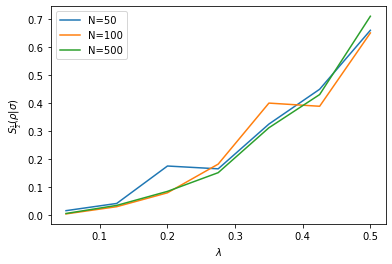

In [23]:
from random import choice
for N in [50,100,500]:
    kappa = 0.5
    list_log_F=[]
    list_log_F_avg=[]
    list_lambda=[]
    for lamb in np.linspace(0.05,0.5,7):
        m=int(lamb*N)
        m1=int(kappa*N)
        m2=int((1-kappa)*N)
        identity = np.diag([1 for i in range(m)])
        list_lambda.append(lamb)
        renyi_rel_S = []

###################################################################################
###################################################################################
# We can decide how to build our correlation matrices here,
#so this may be the only place that you need to change
        U = unitary_group.rvs(N)
        V1 = U[:m1,:m]
        C1 = V1.conj().T.dot(V1)
        ev1,_ = LA.eig(C1)
        ev1 = np.real(ev1)
        #index = random.choice(range(m))
        #randlist =[i for i in range(index)]+[m]+[i for i in range(index+1,m)]
        V2 = U[1:m1+1,:m]
        C2 = V2.conj().T.dot(V2)
        ev2,_ = LA.eig(C2)
        ev2 = np.real(ev2)
###################################################################################
###################################################################################


        #The eigenvalues of I-C and I-C' .
        ev_1_minus_C1 = 1-ev1
        ev_1_minus_C2 = 1-ev2


        for alpha in np.linspace(0.75,0.35,10):

            # Calculate the term 1+(( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
            long_term = identity+fracpower(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha)).dot(C2.dot(inv(identity-C2))).dot(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha))),alpha)
            ev_last, _ = LA.eig(long_term)
            ev_last = np.real(ev_last)
            S_last_term = sum(np.log(ev_last))
            S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*S_last_term
            renyi_rel_S.append(S_alpha)
        print('kappa:',kappa)
        print('lamb:',lamb)
        s1, s0 = np.polyfit(np.linspace(0.75,0.35,10)[4:7], renyi_rel_S[4:7],1)
        list_log_F.append(s1*0.5+s0)
        list_log_F_avg.append((s1*0.5+s0)/m)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$S_{\frac{1}{2}}(\rho\|\sigma)$')
    plt.plot(list_lambda, list_log_F,label ='N=%d'%N)
plt.legend()
#plt.savefig('N_compare_with_legend_permute_1.png', dpi=800)
plt.show()


In [5]:
#Anderson
from random import uniform
W = 1
N = 10
H_anderson = [[0 for i in range(N)] for j in range(N)]
for i in range(N):
    H_anderson[i][i] = W/2*uniform(-1,1)
    if i == 0:
        H_anderson[0][1] = -1
        H_anderson[0][-1] = -1
    elif i == N-1:
        H_anderson[N-1][N-2] = -1
        H_anderson[N-1][0] = -1
    else:
        H_anderson[i][i+1] = -1
        H_anderson[i][i-1] = -1



[[-0.31907191574372706, -1, 0, 0, 0, 0, 0, 0, 0, -1], [-1, 0.14611069983902214, -1, 0, 0, 0, 0, 0, 0, 0], [0, -1, -0.3616046223238065, -1, 0, 0, 0, 0, 0, 0], [0, 0, -1, -0.4023606406282476, -1, 0, 0, 0, 0, 0], [0, 0, 0, -1, 0.1019953289490646, -1, 0, 0, 0, 0], [0, 0, 0, 0, -1, -0.074660460438149, -1, 0, 0, 0], [0, 0, 0, 0, 0, -1, -0.0247450677394373, -1, 0, 0], [0, 0, 0, 0, 0, 0, -1, -0.08310086836705988, -1, 0], [0, 0, 0, 0, 0, 0, 0, -1, 0.0002412479064115569, -1], [-1, 0, 0, 0, 0, 0, 0, 0, -1, 0.408929375783462]]


L:  5
N= 125 . List of S_1/2:  [0.06437748577826485, 0.3422049540468883, 0.8824481458093265, 1.205798168745031, 1.7220900808437316, 3.1624090219646086, 3.972455328705669, 4.907286898588713, 6.609713240702682, 8.892291906979862, 10.107894536941277, 11.967052822517955, 15.603232610750737, 18.405119445821335, 21.699082769906425]
L:  6
N= 216 . List of S_1/2:  [0.20724179632998752, 0.5721617915207801, 1.4864684247007849, 2.4341773552754082, 4.266741053820109, 5.336401768917667, 6.727542703604204, 8.85838739073873, 12.323151358140452, 16.070917055388225, 17.59299390033518, 22.423083283174705, 26.89651405809674, 33.12495919703821, 36.01747416738999]
L:  7
N= 343 . List of S_1/2:  [0.3621146829054692, 1.1134474281311582, 2.674057100624351, 4.060620103123817, 5.630952678205406, 8.425890508252007, 10.73327688317866, 14.476353241396243, 19.31989053682553, 25.22359294006878, 28.02565964750268, 35.46014005846468, 41.57842871518096, 49.42086879272186, 58.041179489453285]


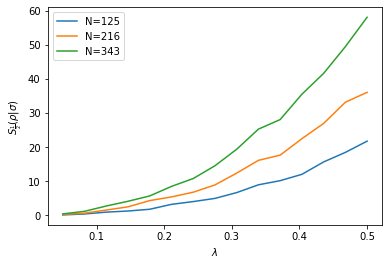

In [106]:
from random import choice
from random import uniform
import sympy
from numpy import linalg as LA

def U_anderson(W,L):
    N=L**3
    
   
    H_anderson = [[0 for i in range(N)] for j in range(N)]
    for i in range(N):
        H_anderson[i][i] = W/2*uniform(-1,1)
        x = (i) %L
        y = int((i-x)/L)%L
        z = int((i-x-y*L)/(L**2))
        i1= (x+1)%L + y*L + z*(L**2)
        i2 = (x-1)%L + y*L + z*(L**2)
        i3 = x + ((y-1)%L)*L + z*(L**2)
        i4 = x + ((y+1)%L)*L + z*(L**2)
        i5 = x + y*L + ((z-1)%L)*(L**2)
        i6 = x + y*L + ((z+1)%L)*(L**2)
        H_anderson[i][i1] = -1
        H_anderson[i][i2] = -1
        H_anderson[i][i3] = -1
        H_anderson[i][i4] = -1
        H_anderson[i][i5] = -1
        H_anderson[i][i6] = -1
    w, v = LA.eig(H_anderson)
    
    return np.array(v).T

#################################################################
# These are some parameters that you may want to play with:

W = 1 # W in the Anderson model.
range_L = [5,6,7] # note that N = L**3
kappa = 0.5
lambda_max = 0.5

###################################################################

for L in range_L:
    print("L: ",L)
    N = L**3
    list_log_F=[]
    list_log_F_avg=[]
    list_lambda=[]
    for lamb in np.linspace(0.05,lambda_max,15):
        m=int(lamb*N)
        m1=int(kappa*N)
        m2=int((1-kappa)*N)
        identity = np.diag([1 for i in range(m)])
        list_lambda.append(lamb)
        renyi_rel_S = []
    
        U = U_anderson(W,L)
        #print(U)
        rand_list = [i for i in range(N)]
        shuffle(rand_list)
        V1 = U[:m1,rand_list[:m]]
        C1 = V1.conj().T.dot(V1)
        ev1,_ = LA.eig(C1)
        ev1 = np.real(ev1)
        #index = random.choice(range(m))
        #randlist =[i for i in range(index)]+[m]+[i for i in range(index+1,m)]
        V2 = U[:m1,rand_list[1:m+1]]
        C2 = V2.conj().T.dot(V2)
        ev2,_ = LA.eig(C2)
        ev2 = np.real(ev2)

        #The eigenvalues of I-C and I-C' .
        ev_1_minus_C1 = 1-ev1
        ev_1_minus_C2 = 1-ev2

       # print("ev_1_minus_C1: ",ev_1_minus_C1)
       # print("ev_1_minus_C2: ",ev_1_minus_C2)
        


        for alpha in np.linspace(0.55,0.45,10):

            # Calculate the term 1+(( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
            long_term = identity+fracpower(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha)).dot(C2.dot(inv(identity-C2))).dot(fracpower(C1.dot(inv(identity-C1)),(1-alpha)/(2*alpha))),alpha)
            ev_last, _ = LA.eig(long_term)
            ev_last = np.real(ev_last)

            S_last_term = sum(np.log(ev_last))
            S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*S_last_term
            renyi_rel_S.append(S_alpha)
        #print('kappa:',kappa)
        #print('lamb:',lamb)
        s1, s0 = np.polyfit(np.linspace(0.55,0.45,10)[3:7], renyi_rel_S[3:7],1)
        list_log_F.append(s1*0.5+s0)
        list_log_F_avg.append((s1*0.5+s0)/m)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$S_{\frac{1}{2}}(\rho\|\sigma)$')
    plt.plot(list_lambda, list_log_F,label ='N=%d'%N)
    plt.legend()
    print("N=",N,". List of S_1/2: ", list_log_F)
plt.savefig('log_F_Anderson_compare', dpi=800)
plt.show()




In [58]:
-1 %50

49